In [49]:
from IPython.display import Image

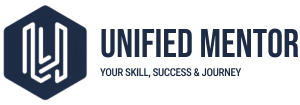

In [50]:
display(Image(filename="C:/Users/SAMIM IMTIAZ/Desktop/unified_logo.png"))

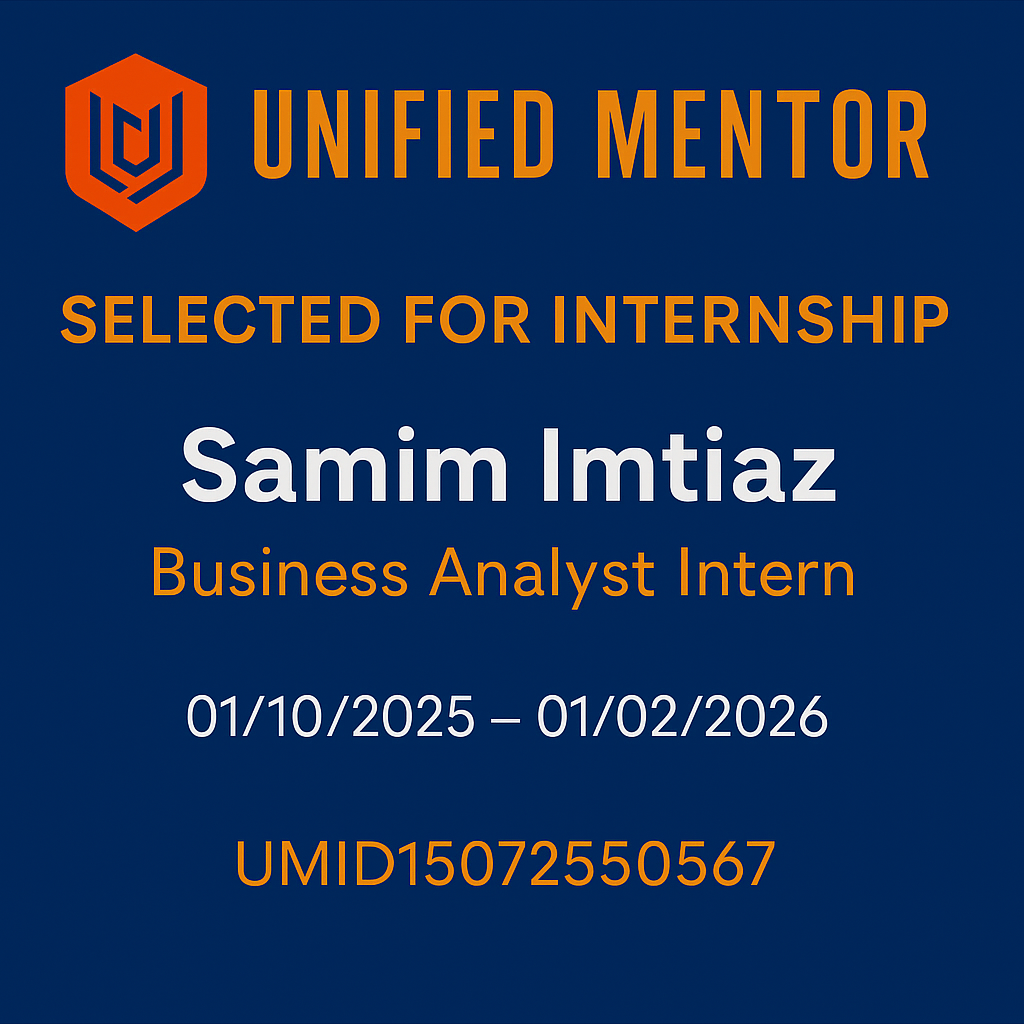

In [51]:
display(Image(filename="C:/Users/SAMIM IMTIAZ/Desktop/unified.png", width=300, height=50))

In [52]:
import pandas as pd 
import numpy as np

df = pd.read_csv(r"C:\Users\SAMIM IMTIAZ\Desktop\financial_data.csv")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",6/1/2014,6,June,2014


In [53]:
import pandas as pd 
import numpy as np

df = pd.read_csv(r"C:\Users\SAMIM IMTIAZ\Desktop\financial_data.csv")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",6/1/2014,6,June,2014


In [54]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [55]:
len(df)

700

In [56]:
df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [57]:
df.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

In [58]:
for col in numeric_cols:
    bad = df[~df[col].astype(str).str.replace('[0-9\.\-]', '', regex=True).eq('')]
    if len(bad):
        print(f"{col} — {len(bad)} problematic rows")

 Units Sold  — 700 problematic rows
 Manufacturing Price  — 700 problematic rows
 Sale Price  — 700 problematic rows
 Gross Sales  — 700 problematic rows
 Discounts  — 700 problematic rows
  Sales  — 700 problematic rows
 COGS  — 700 problematic rows
 Profit  — 700 problematic rows


In [59]:
import pandas as pd
import numpy as np

numeric_cols = [
   ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit '
]

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('$', '', regex=False)
        .str.replace(' ', '', regex=False)
        .str.replace('–', '', regex=False)  # handles dash (en-dash)
        .str.replace('-', '', regex=False)  # handles minus/dash
        .str.strip()
    )
    # Convert invalid to NaN safely
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df.dtypes)

Segment                          object
Country                          object
 Product                         object
 Discount Band                   object
 Units Sold                     float64
 Manufacturing Price            float64
 Sale Price                     float64
 Gross Sales                    float64
 Discounts                      float64
  Sales                         float64
 COGS                           float64
 Profit                         float64
Date                     datetime64[ns]
Month Number                      int64
 Month Name                      object
Year                              int64
dtype: object


In [60]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [61]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']


In [62]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [63]:
df['Profit Margin %'] = (df['Profit'] / df['Sales']) * 100

In [64]:
df['Profit Margin %'] = np.where(df['Sales'] > 0, (df['Profit'] / df['Sales']) * 100, np.nan)

In [65]:
df['Gross Margin %'] = ((df['Sales'] - df['COGS']) / df['Sales']) * 100

In [66]:
df['Gross Margin %'] = np.where(df['Sales'] > 0, ((df['Sales'] - df['COGS']) / df['Sales']) * 100, np.nan)

In [67]:
df['Discount %'] = (df['Discounts'] / df['Gross Sales']) * 100

In [68]:
df['Discount %'] = np.where(df['Gross Sales'] > 0, (df['Discounts'] / df['Gross Sales']) * 100, np.nan)

In [69]:
df_yoy = df.groupby('Year')['Sales'].sum().pct_change() * 100
print(df_yoy)

Year
2013           NaN
2014    249.461298
Name: Sales, dtype: float64


In [70]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year',
       'Profit Margin %', 'Gross Margin %', 'Discount %'],
      dtype='object')

In [71]:
df['Country'].nunique()

5

In [72]:
df['Country'].unique()

array(['Canada', 'Germany', 'France', 'Mexico',
       'United States of America'], dtype=object)

In [73]:
df.to_csv("Financial_Performance_Clean.csv", index=False)

In [74]:
out_path = r"C:\Users\SAMIM IMTIAZ\Desktop\Financial_Performance.csv"
df.to_csv(out_path, index=False)
print("✅ Saved:", out_path)

✅ Saved: C:\Users\SAMIM IMTIAZ\Desktop\Financial_Performance.csv
